In [1]:
"""Analysis of the greedy results"""

from __future__ import annotations

import json
from typing import List

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

matplotlib.rcParams['font.family'] = "monospace"
%matplotlib inline

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from core.core import decode_filename, save_plot, analysis_filename

In [4]:
basic = [
    "optimal_greedy_test_basic_j12_s2_0",
    # "optimal_greedy_test_basic_j15_s2_0",
    "optimal_greedy_test_basic_j15_s3_0",
    "optimal_greedy_test_basic_j25_s5_0",
    "optimal_greedy_test_basic_j50_s5_0"
]

big_small = [
    "optimal_greedy_test_big_small_j12_s2_0",
    # "optimal_greedy_test_big_small_j15_s2_0",
    "optimal_greedy_test_big_small_j15_s3_0",
    "optimal_greedy_test_big_small_j25_s5_0",
    "optimal_greedy_test_big_small_j50_s7_0",
    "optimal_greedy_test_big_small_j75_s8_0",
    "optimal_greedy_test_big_small_j100_s10_0"
]

In [5]:
encoded_filenames = basic
x_axis = 'Sum Value'
title = "{} of {} model".format(x_axis, 'Basic')

In [8]:
data = []
model_names: List[str] = []
test_name: str = ''

for encoded_filename in encoded_filenames:
    filename, model_name, test_name = decode_filename('greedy', encoded_filename)
    model_names.append(model_name)
    
    with open(filename) as file:
        json_data = json.load(file)
        
        for pos, results in enumerate(json_data):
            # Find the best results of sum value or percentage jobs from all of the algorithms
            best_sum_value = max(r['sum value'] for a, r in results.items()
                                 if a != 'Relaxed' and type(r) is dict)
            best_percentage_jobs = max(r['percentage jobs'] for a, r in results.items()
                                       if a != 'Relaxed' and type(r) is dict)
            
            for algo_name, algo_results in results.items():
                if type(algo_results) is dict:  # Otherwise optimal or relaxed == 'failure'
                    data.append((pos, model_name, algo_name, algo_results['sum value'],
                                 algo_results['percentage jobs'], algo_results['solve_time'],
                                 algo_results['sum value'] / best_sum_value,
                                 algo_results['percentage jobs'] / best_percentage_jobs))

df = pd.DataFrame(data, columns=['Pos', 'Model Name', 'Algorithm Name', 'Sum Value', 'Percentage Jobs',
                                 'Solve Time', 'Best Sum Value', 'Best Percentage Jobs'])

In [10]:
df = df.loc[~((df['Algorithm Name'].str.contains('Greedy Utility * deadline / Sum', regex=False)) |
              (df['Algorithm Name'].str.contains('Greedy Utility / Sqrt Sum', regex=False)) |
              df['Algorithm Name'].str.contains('Matrix Greedy Sum Exp^3 Percentage', regex=False))]
df['Algorithm Name'].unique()

array(['optimal', 'Relaxed', 'Greedy Utility / Sum, Sum, Percentage Sum',
       'Greedy Utility / Sum, Sum, Expo percentage sum',
       'Greedy Utility / Sum, Sum, Sum of speeds',
       'Greedy Utility / Sum, Product, Percentage Sum',
       'Greedy Utility / Sum, Product, Expo percentage sum',
       'Greedy Utility / Sum, Product, Sum of speeds',
       'Greedy Utility / Sum, Exponential Sum, Percentage Sum',
       'Greedy Utility / Sum, Exponential Sum, Expo percentage sum',
       'Greedy Utility / Sum, Exponential Sum, Sum of speeds',
       'Greedy Utility / Sum, Random, Percentage Sum',
       'Greedy Utility / Sum, Random, Expo percentage sum',
       'Greedy Utility / Sum, Random, Sum of speeds',
       'Matrix Greedy Sum Usage', 'Matrix Greedy Sum Percentage',
       'Matrix Greedy Sum Exp Percentage'], dtype=object)

c:\users\mark\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


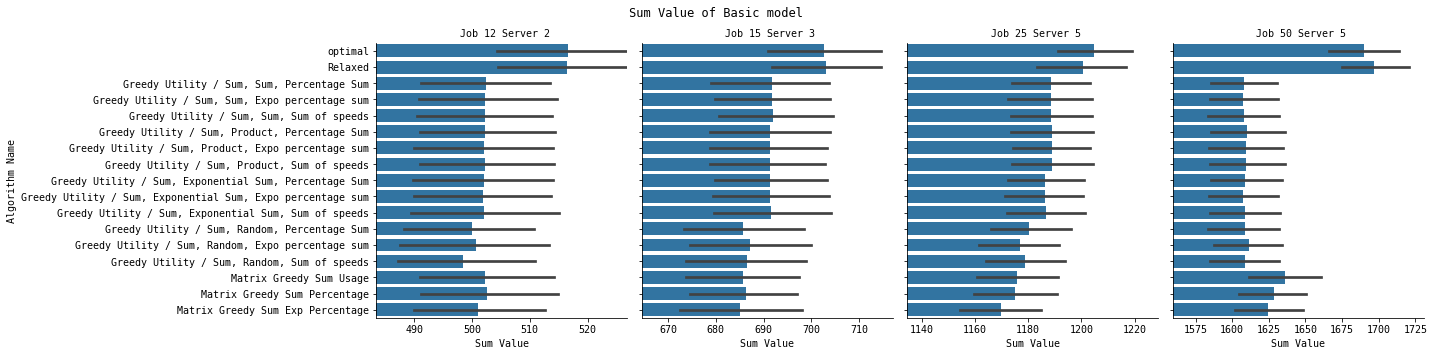

In [11]:
g = sns.FacetGrid(df, col='Model Name', sharex=False, height=5)
g = g.map(sns.barplot, x_axis, 'Algorithm Name').set_titles("{col_name}")

for pos, model in enumerate(model_names):
    values = [np.mean(df[(df['Model Name'] == model) & (df['Algorithm Name'] == algo)][x_axis])
              for algo in df['Algorithm Name'].unique()]
    g.axes[0, pos].set_xlim(min(values) * 0.97, max(values) * 1.02)

g.fig.subplots_adjust(top=0.88)
g.fig.suptitle(title)

g    